In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
worksheet = gc.open('eFEDS_VLASS_Simbad').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

index = [i[0] for i in rows[1:]]
adjusted_rows = [i[1:] for i in rows[1:]]

import pandas as pd
df = pd.DataFrame.from_records(adjusted_rows, columns=rows[0][1:], index=index)

df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
eFEDS J093700.9+010545,144.2538329,1.095920409,6.21E-12,144.2543591,1.095466302,4,-0.0712,0.0514,0.018,0.051,...,15.393069,4.24E-04,15.463301,4.89E-04,0.050684266,SECURE EXTRAGALACTIC,,,137,Seyfert_1
eFEDS J091453.4+042636,138.7228791,4.44338404,4.42E-12,138.7232072,4.442907678,4,55.9338,0.1607,-75.445,0.161,...,11.818934,0.0015543416,14.762686,0.018857492,,SECURE GALACTIC,,,83,SB*
eFEDS J085617.8-013805,134.0741705,-1.634745037,3.99E-12,134.0742909,-1.635378822,4,0.0241,0.1252,-0.077,0.153,...,15.390414,5.90E-04,14.928375,6.54E-04,0.05967131,SECURE EXTRAGALACTIC,,,26,Seyfert_1
eFEDS J084025.4+033302,130.1060962,3.55080893,3.09E-12,130.1063009,3.550497349,4,-0.0112,0.1106,0.041,0.108,...,16.7818,8.57E-04,16.917795,8.82E-04,0.060387,SECURE EXTRAGALACTIC,,,22,Seyfert_1
eFEDS J091639.7+004343,139.1654354,0.7287895713,2.03E-12,139.1645801,0.7274794535,2,,,,,...,16.775991,0.0011824907,16.449928,9.68E-04,,LIKELY GALACTIC,,,,


In [ ]:
df.describe()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
count,27369,27369,27369,27369,27369,27369,27369,27369,27369,27369,...,27369,27369,27369,27369,27369,27369,27369,27369,27369,27369
unique,27365,27369,1656,27366,27366,5,7827,5904,5175,1977,...,27247,25975,27240,26456,6530,4,656,656,71,56
top,129.575849,1.095920409,1.02E-14,141.3231013,4.589785425,4,,,,,...,,,,,,LIKELY EXTRAGALACTIC,,,,
freq,2,1,256,2,2,20873,18609,18609,18609,18609,...,16,16,25,25,20498,19016,26714,26714,20737,20737


In [ ]:
df.shape

(27369, 42)

In [3]:
import numpy as np
df = df.replace('',np.nan)

In [ ]:
df.isnull().sum()

ERO_RA_CORR                    0
ERO_DEC_CORR                   0
ERO_ML_FLUX                    0
CTP_LS8_RA                     0
CTP_LS8_DEC                    0
CTP_quality                    0
GaiaEDR3_parallax          18609
GaiaEDR3_parallax_error    18609
GaiaEDR3_pmra              18609
GaiaEDR3_pmra_error        18609
GaiaEDR3_pmdec             18609
GaiaEDR3_pmdec_error       18609
FUV                        25136
FUV_ERR                    25136
NUV                        21579
NUV_ERR                    21579
VISTA_J                    14828
VISTA_J_ERR                14828
VISTA_H                    14861
VISTA_H_ERR                14861
VISTA_Ks                   14838
VISTA_Ks_ERR               14838
W1                           120
W1_ERR                       120
W2                           162
W2_ERR                       162
W3                          5688
W3_ERR                      5688
W4                         10021
W4_ERR                     10021
LS8_g     

In [4]:
df[df.columns[:-5]] = df[df.columns[:-5]].apply(pd.to_numeric)
df[df.columns[-4:-1]] = df[df.columns[-4:-1]].apply(pd.to_numeric)
df.dtypes

ERO_RA_CORR                float64
ERO_DEC_CORR               float64
ERO_ML_FLUX                float64
CTP_LS8_RA                 float64
CTP_LS8_DEC                float64
CTP_quality                  int64
GaiaEDR3_parallax          float64
GaiaEDR3_parallax_error    float64
GaiaEDR3_pmra              float64
GaiaEDR3_pmra_error        float64
GaiaEDR3_pmdec             float64
GaiaEDR3_pmdec_error       float64
FUV                        float64
FUV_ERR                    float64
NUV                        float64
NUV_ERR                    float64
VISTA_J                    float64
VISTA_J_ERR                float64
VISTA_H                    float64
VISTA_H_ERR                float64
VISTA_Ks                   float64
VISTA_Ks_ERR               float64
W1                         float64
W1_ERR                     float64
W2                         float64
W2_ERR                     float64
W3                         float64
W3_ERR                     float64
W4                  

In [5]:
df = df[df.CTP_quality>2]
df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
eFEDS J093700.9+010545,144.253833,1.095920,6.210000e-12,144.254359,1.095466,4,-0.0712,0.0514,0.018,0.051,...,15.393069,0.000424,15.463301,0.000489,0.050684,SECURE EXTRAGALACTIC,NaN,NaN,137.0,Seyfert_1
eFEDS J091453.4+042636,138.722879,4.443384,4.420000e-12,138.723207,4.442908,4,55.9338,0.1607,-75.445,0.161,...,11.818934,0.001554,14.762686,0.018857,NaN,SECURE GALACTIC,NaN,NaN,83.0,SB*
eFEDS J085617.8-013805,134.074171,-1.634745,3.990000e-12,134.074291,-1.635379,4,0.0241,0.1252,-0.077,0.153,...,15.390414,0.000590,14.928375,0.000654,0.059671,SECURE EXTRAGALACTIC,NaN,NaN,26.0,Seyfert_1
eFEDS J084025.4+033302,130.106096,3.550809,3.090000e-12,130.106301,3.550497,4,-0.0112,0.1106,0.041,0.108,...,16.781800,0.000857,16.917795,0.000882,0.060387,SECURE EXTRAGALACTIC,NaN,NaN,22.0,Seyfert_1
eFEDS J084441.9+004416,131.174734,0.737925,1.890000e-12,131.175092,0.737720,4,15.3973,0.0135,-108.139,0.016,...,10.091446,0.000401,12.566205,0.001924,NaN,SECURE GALACTIC,NaN,NaN,7.0,PM*


In [6]:
df.shape

(22256, 42)

In [7]:
print(df.LS8_g.median(), df.LS8_r.median(), df.LS8_z.median(), df.W1.median(), df.W2.median(), df.W3.median(), df.W4.median(), df.ERO_ML_FLUX.median())

21.195345 20.7580655 20.342543 19.09067 18.889028500000002 17.575010499999998 15.512797500000001 1.5e-14


In [ ]:
def is_AGN(x):
  value = "Unknown"
  try:
    if x.main_type in ["QSO", "Seyfert_1", "Seyfert_2", "BLLac", "Blazar", "RadioG", "AGN"] and x.nbref>=3:
      return True
    elif x.CTP_Classification == "SECURE GALACTIC":
      return False
    elif abs(x.GaiaEDR3_pmra/x.GaiaEDR3_pmra_error)>=3 or abs(x.GaiaEDR3_pmdec/x.GaiaEDR3_pmdec_error)>=3 or abs(x.GaiaEDR3_parallax/x.GaiaEDR3_parallax_error)>=3:
      return False
    elif pd.isna(x.main_type):
      return value
    elif x.nbref<3 or "Candidate" in x.main_type:
      return value
    else:
      return False
  except Exception as e:
    print(e)
    print(x)
    input()


df["is_AGN"] = df.apply(lambda x: is_AGN(x), axis=1)
df.is_AGN.value_counts()

Unknown    16883
True        2726
False       2647
Name: is_AGN, dtype: int64

In [ ]:
df["log_FLUX"]=np.log10(df["ERO_ML_FLUX"])

In [ ]:
def classifier(classification):
  if classification == "SECURE GALACTIC":
    return 0
  elif classification == "SECURE EXTRAGALACTIC":
    return 2
  else:
    return 1

df["classification"] = df.apply(lambda x: classifier(x.CTP_Classification), axis=1)
df.classification.value_counts()

1    15097
2     5100
0     2059
Name: classification, dtype: int64

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
model = HistGradientBoostingClassifier(early_stopping = True, learning_rate = 0.0211, max_iter = 100, max_leaf_nodes = 21)
input_labels = ['LS8_g', 'LS8_r', "LS8_z", "W1", "W2", "W3", "W4", "log_FLUX","classification", "is_AGN"]
known_df = df[df["is_AGN"] != "Unknown"]
known_df = known_df[input_labels]
y = known_df["is_AGN"].astype(int)
X = known_df.drop("is_AGN", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model.fit(X_train, y_train)

HistGradientBoostingClassifier(early_stopping=True, learning_rate=0.0211,
                               max_leaf_nodes=21)

In [ ]:
y_pred = model.predict(X_test)

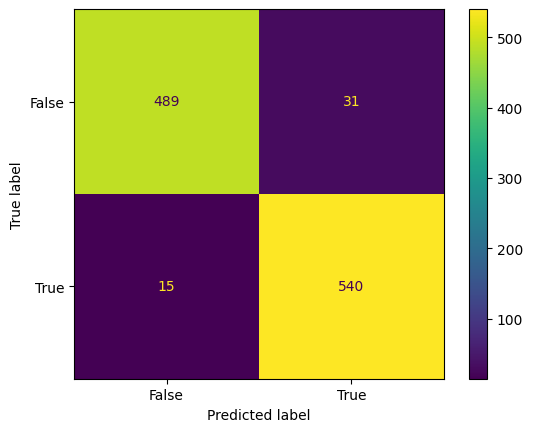

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
 def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))
model_stats(y_test, y_pred)

Accuracy:  0.9534883720930233
Precision:  0.9406631762652705
Recall:  0.9711711711711711


[Text(0, 0.5, 'W1-W2'), Text(0.5, 1.0, 'Predicted dataset')]

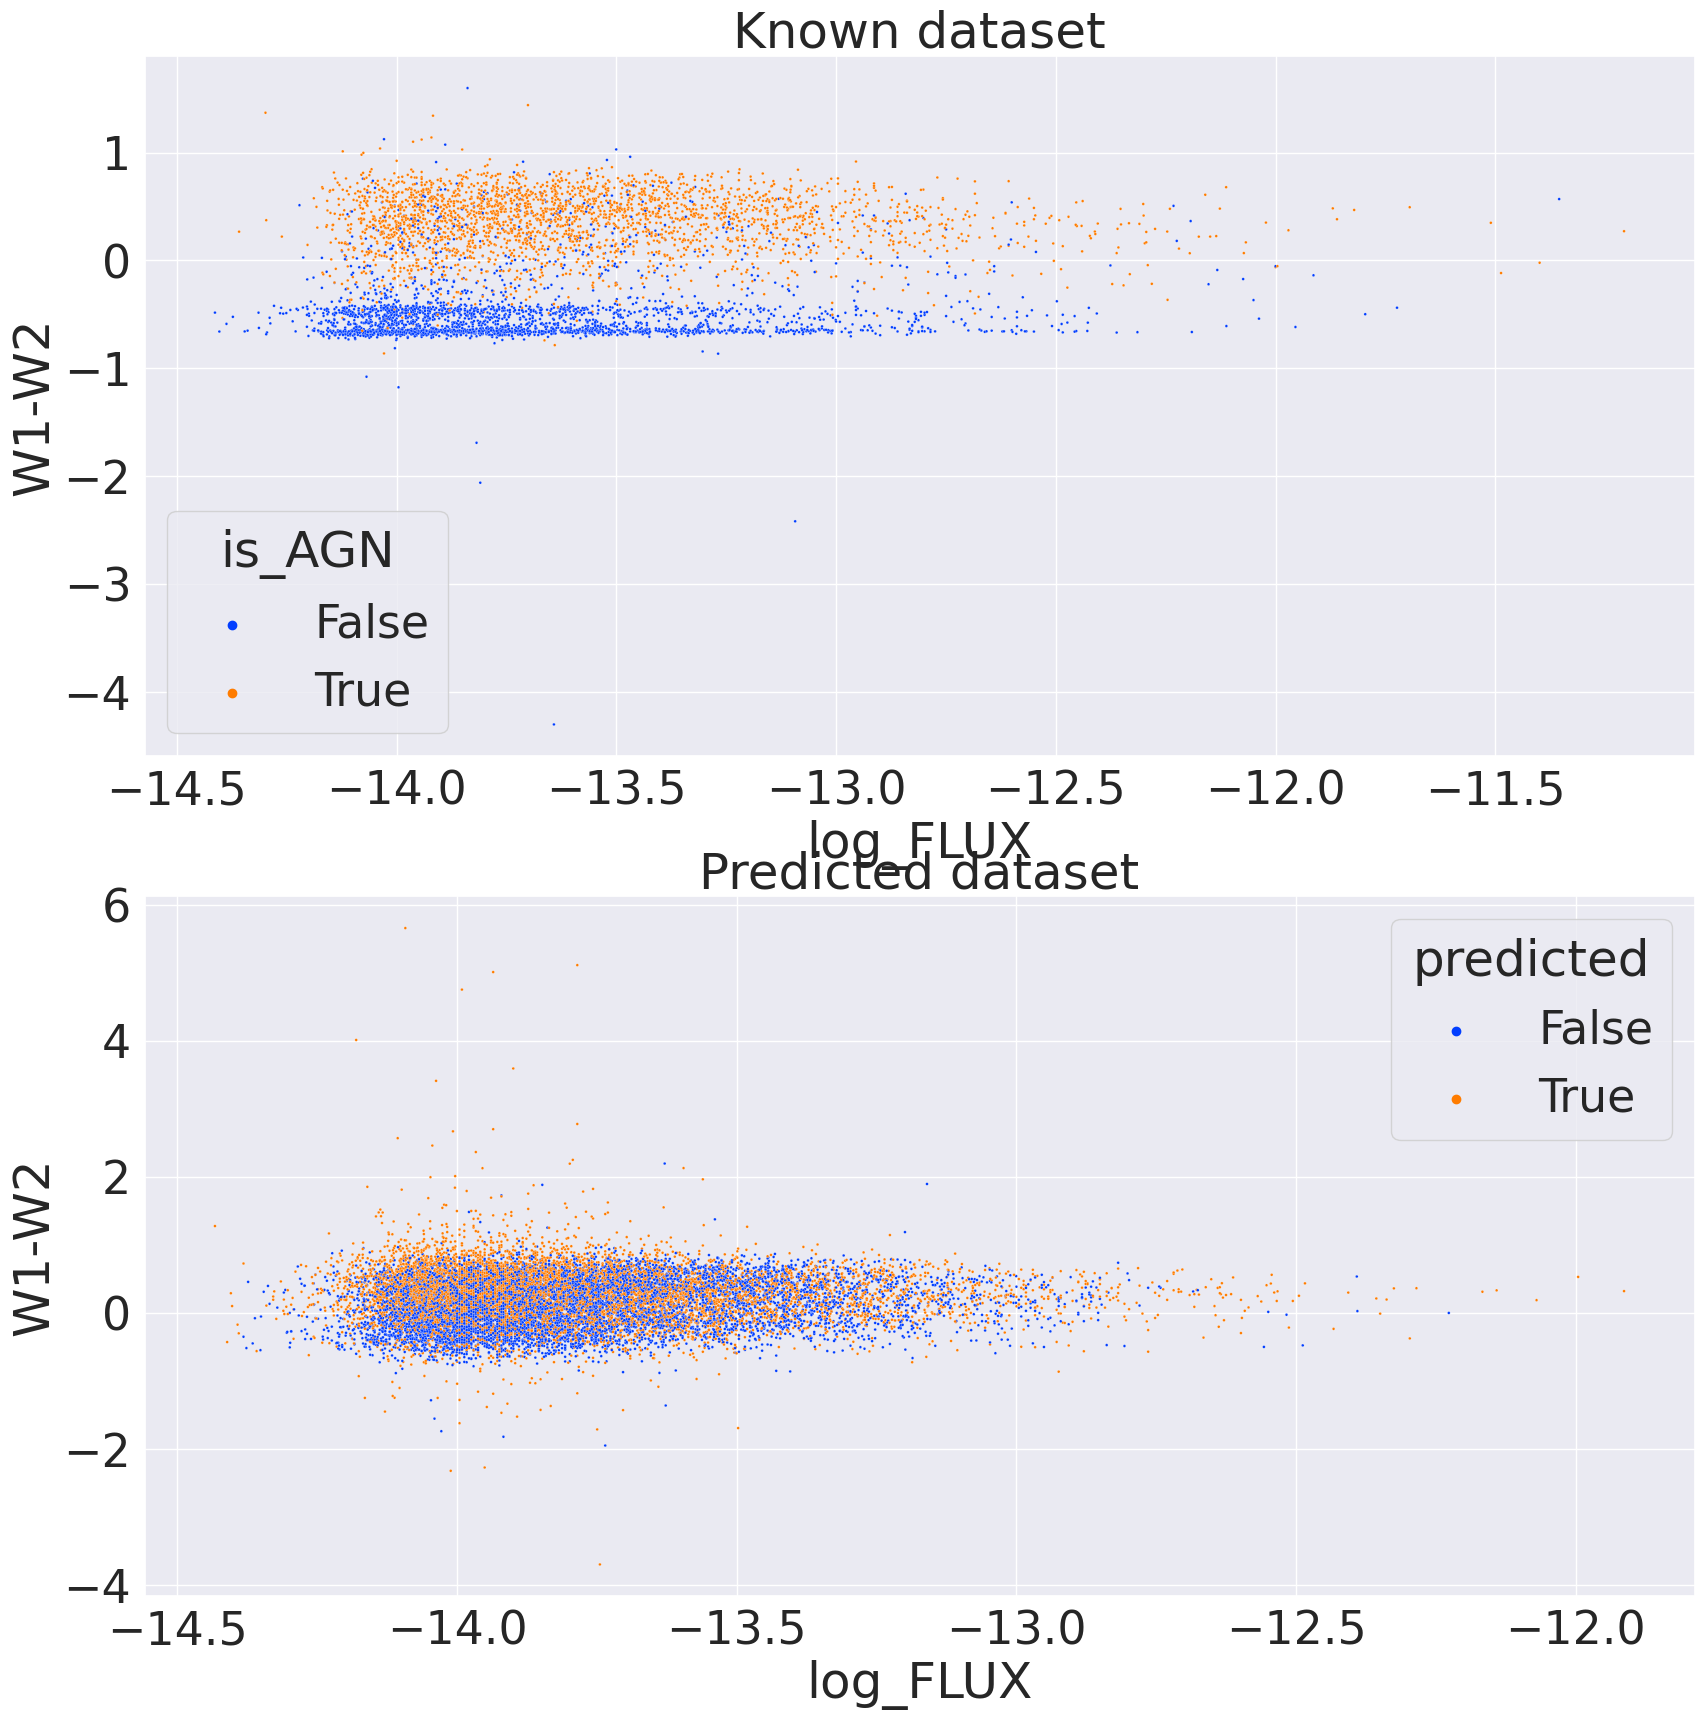

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=3)
unknown_df = df[df["is_AGN"] == "Unknown"]
unknown_df = unknown_df[input_labels]
unknown_df = unknown_df.drop("is_AGN", axis=1)
predicted = model.predict(unknown_df)
unknown_df["predicted"] = predicted

fig, ax =plt.subplots(2,1, figsize = (20,20))
plot1 = sns.scatterplot(x=known_df["log_FLUX"], y = (known_df["W1"]-known_df["W2"]), hue=known_df["is_AGN"], palette="bright", ax=ax[0], s=4)
plot1.set(ylabel= "W1-W2", title = "Known dataset")
plot2 = sns.scatterplot(x=unknown_df["log_FLUX"], y = (unknown_df["W1"]-unknown_df["W2"]), hue=unknown_df["predicted"].astype(bool), palette="bright", ax=ax[1], s=4)
plot2.set(ylabel= "W1-W2", title = "Predicted dataset")

In [ ]:
metrics_dic = {"rate":[],"iter":[],"accuracy":[]}
for rate in np.linspace(0.001,1,100):
  for iter in range(100,1000,100):
    Hist_tree = HistGradientBoostingClassifier(early_stopping = True, learning_rate = rate, max_iter = iter).fit(X_train, y_train)
    y_pred = Hist_tree.predict(X_test)
    metrics_dic["rate"].append(rate)
    metrics_dic["iter"].append(iter)
    metrics_dic["accuracy"].append(metrics.accuracy_score(y_test, y_pred))

metrics_df=pd.DataFrame(metrics_dic)

[Text(0, 0.5, 'g-r'), Text(0.5, 1.0, 'Predicted dataset')]

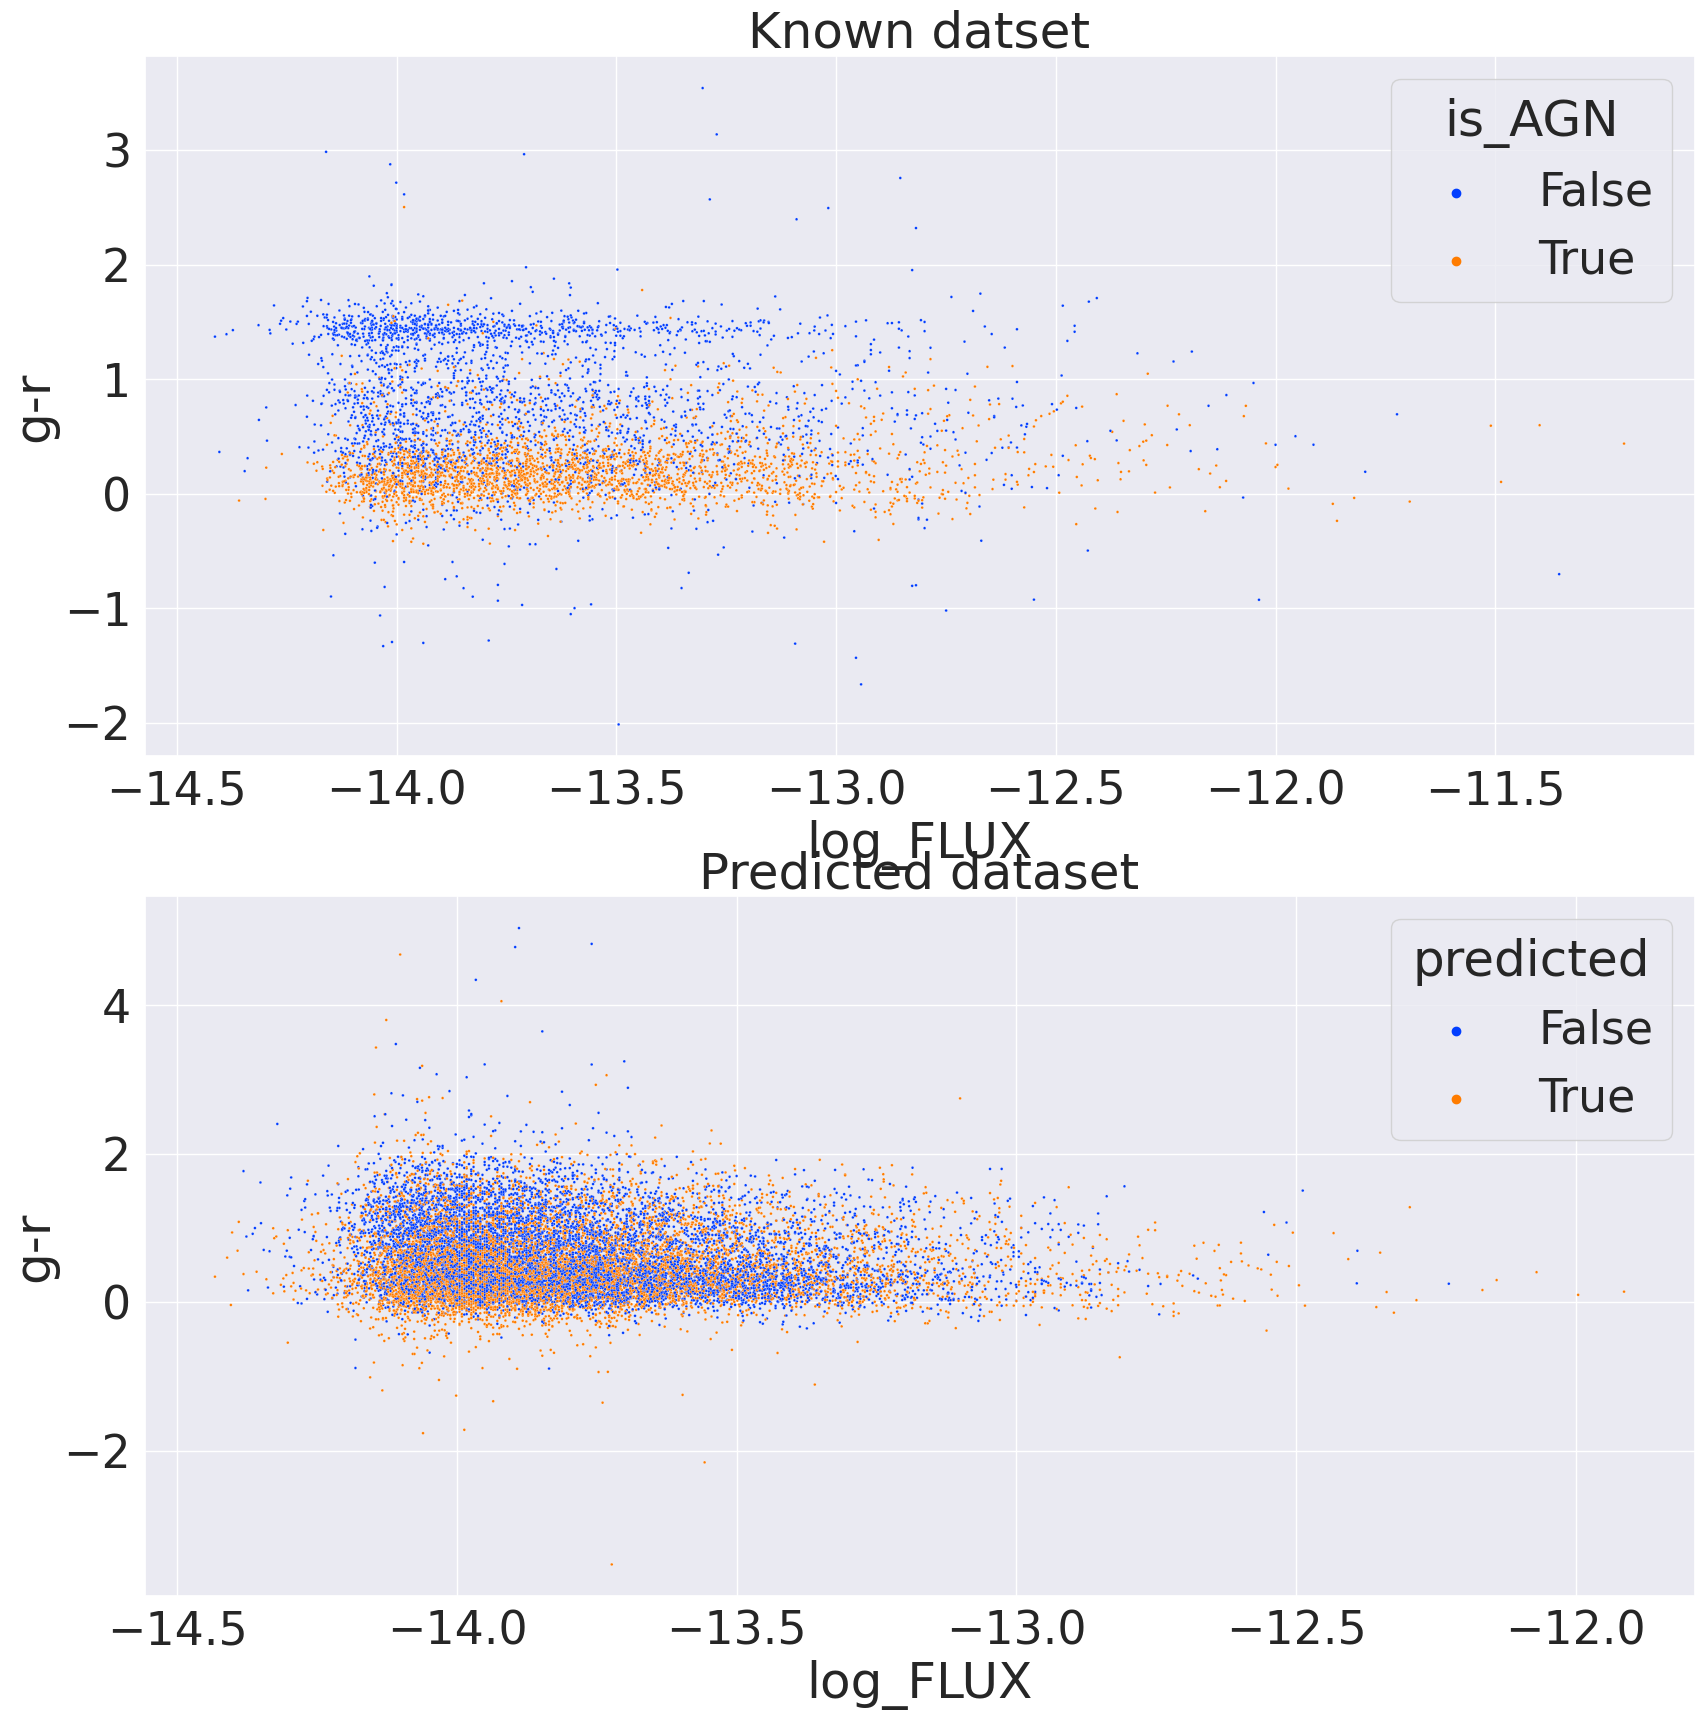

In [ ]:
fig, ax =plt.subplots(2,1, figsize = (20,20))
plot1 = sns.scatterplot(x=known_df["log_FLUX"], y = (known_df["LS8_g"]-known_df["LS8_r"]), hue=known_df["is_AGN"], palette="bright", ax=ax[0], s=4)
plot1.set(ylabel= "g-r", title = "Known datset")
plot2 = sns.scatterplot(x=unknown_df["log_FLUX"], y = (unknown_df["LS8_g"]-unknown_df["LS8_r"]), hue=unknown_df["predicted"].astype(bool), palette="bright", ax=ax[1], s=4)
plot2.set(ylabel= "g-r", title = "Predicted dataset")

<Axes: xlabel='log_FLUX', ylabel='Count'>

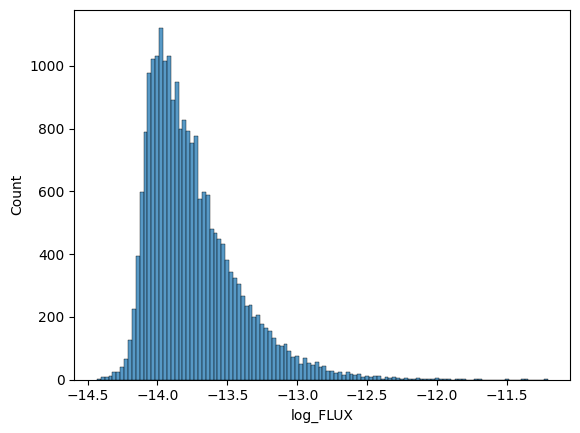

In [ ]:
sns.histplot(data = df, x="log_FLUX")

<Axes: xlabel='W1', ylabel='Count'>

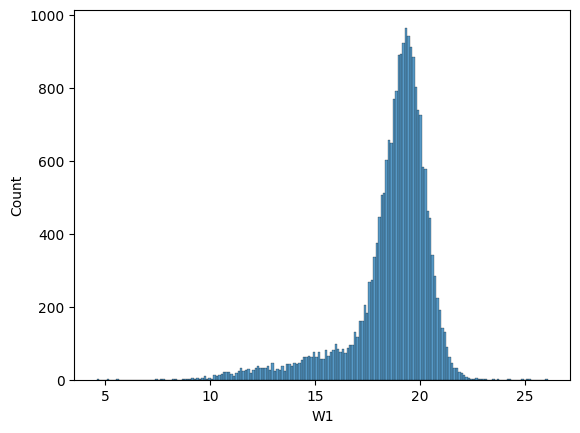

In [ ]:
sns.histplot(data = df, x="W1")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Regression_model = RandomForestClassifier(n_estimators = 800, random_state = 0, min_samples_split=9)
Regression_model.fit(X_train, y_train)

y_pred = Regression_model.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.9573590096286108
Precision:  0.955
Recall:  0.9670886075949368


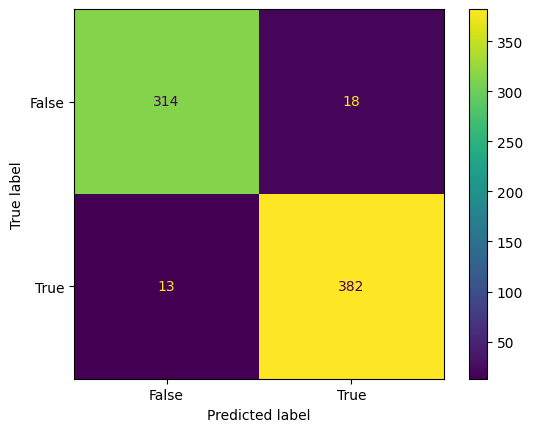

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

[Text(0, 0.5, 'W1-W2'), Text(0.5, 1.0, 'Predicted dataset')]

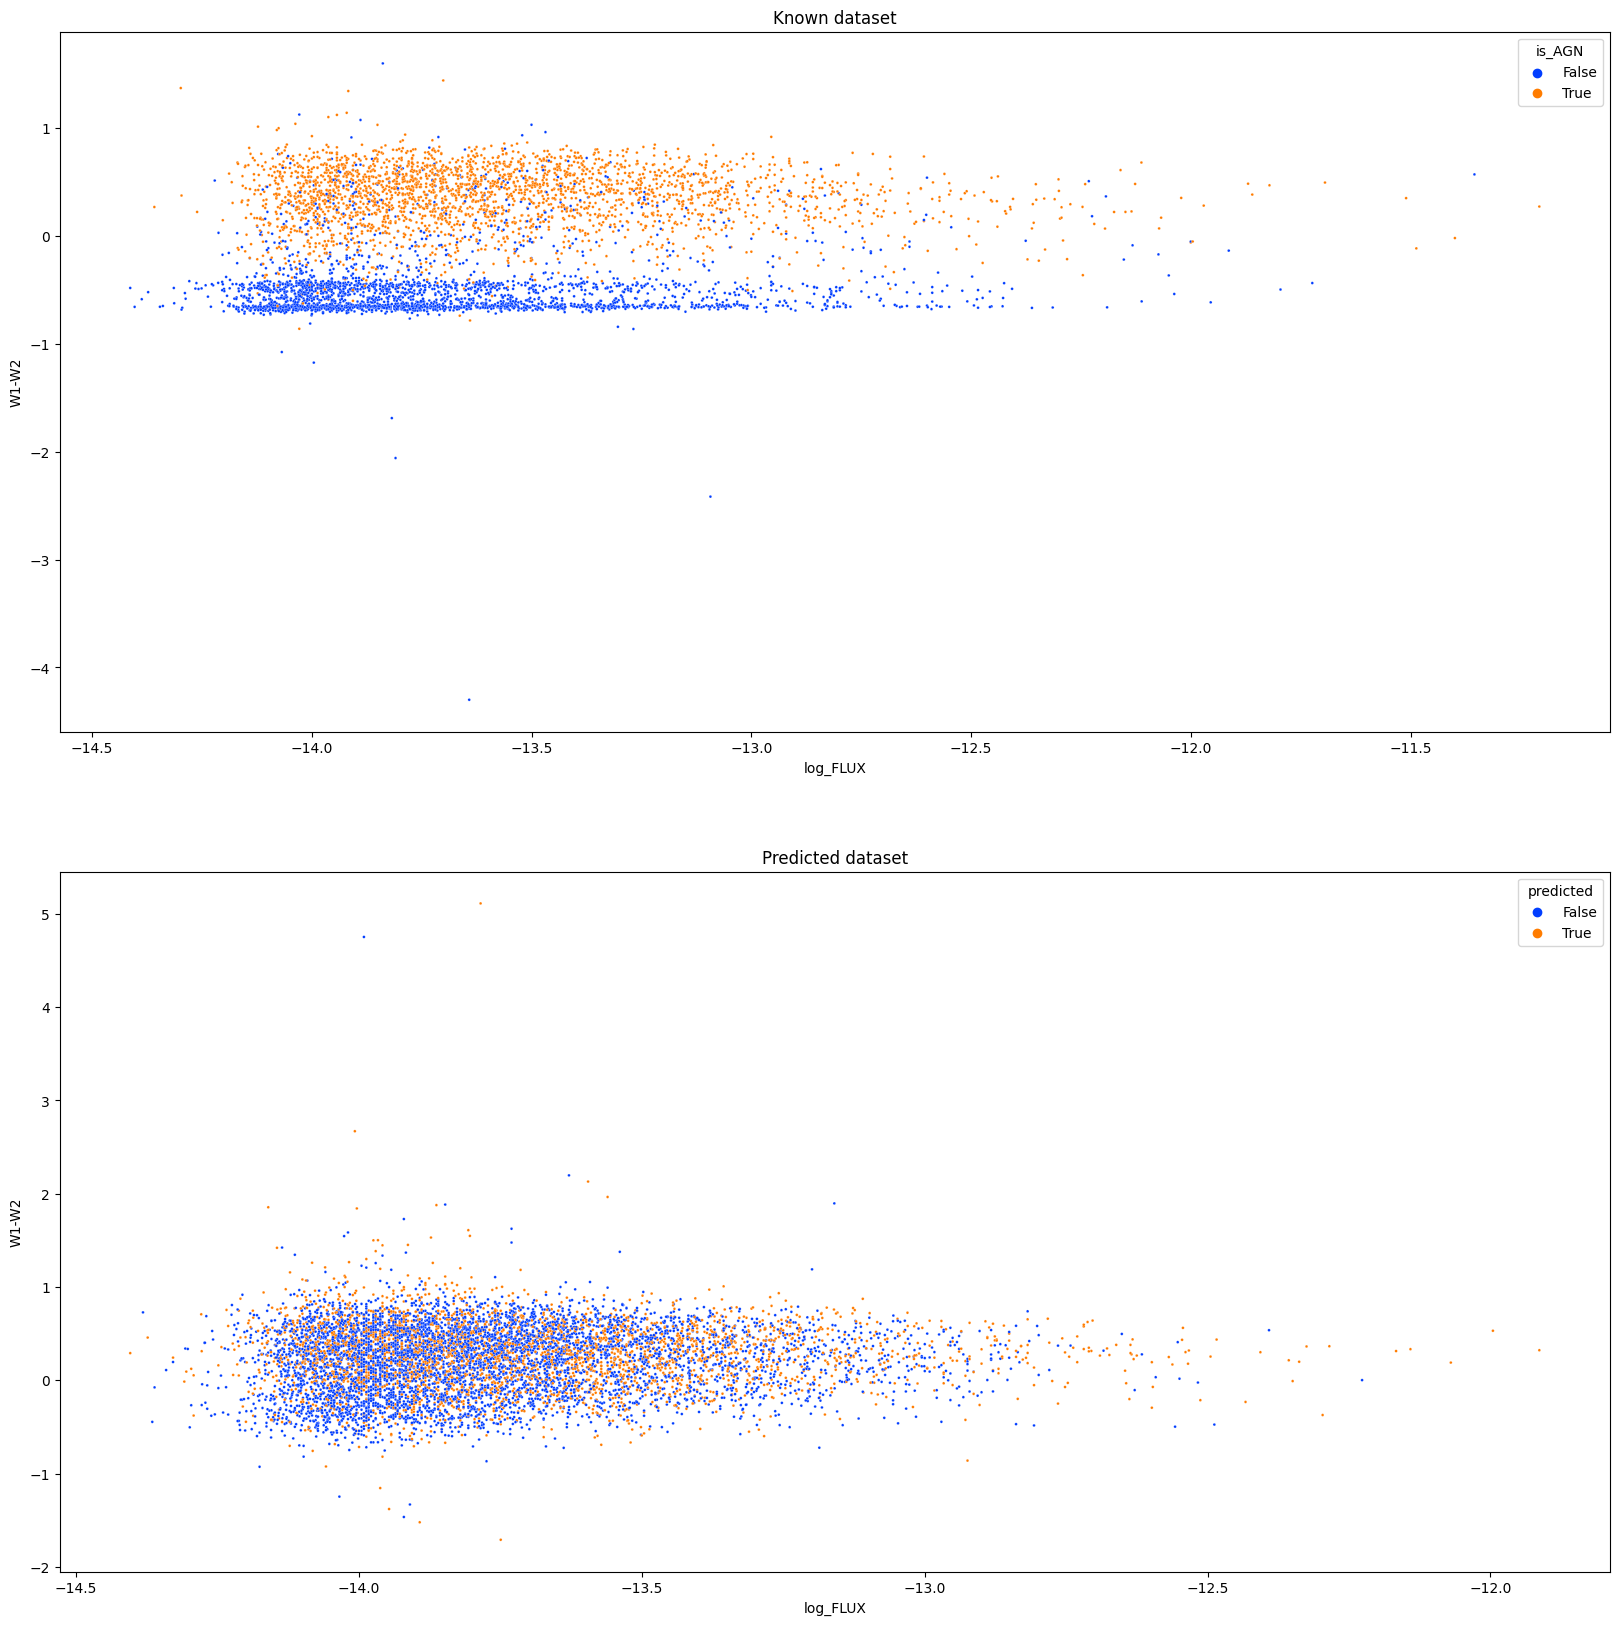

In [ ]:
unknown_df = df[df["is_AGN"] == "Unknown"]
unknown_df = unknown_df[input_labels]
unknown_df = unknown_df.drop("is_AGN", axis=1)
unknown_df =unknown_df.dropna()
predicted = Regression_model.predict(unknown_df)
unknown_df["predicted"] = predicted

fig, ax =plt.subplots(2,1, figsize = (20,20))
plot1 = sns.scatterplot(x=known_df["log_FLUX"], y = (known_df["W1"]-known_df["W2"]), hue=known_df["is_AGN"], palette="bright", ax=ax[0], s=4)
plot1.set(ylabel= "W1-W2", title = "Known dataset")
plot2 = sns.scatterplot(x=unknown_df["log_FLUX"], y = (unknown_df["W1"]-unknown_df["W2"]), hue=unknown_df["predicted"].astype(bool), palette="bright", ax=ax[1], s=4)
plot2.set(ylabel= "W1-W2", title = "Predicted dataset")

[Text(0, 0.5, 'g-r'), Text(0.5, 1.0, 'Predicted dataset')]

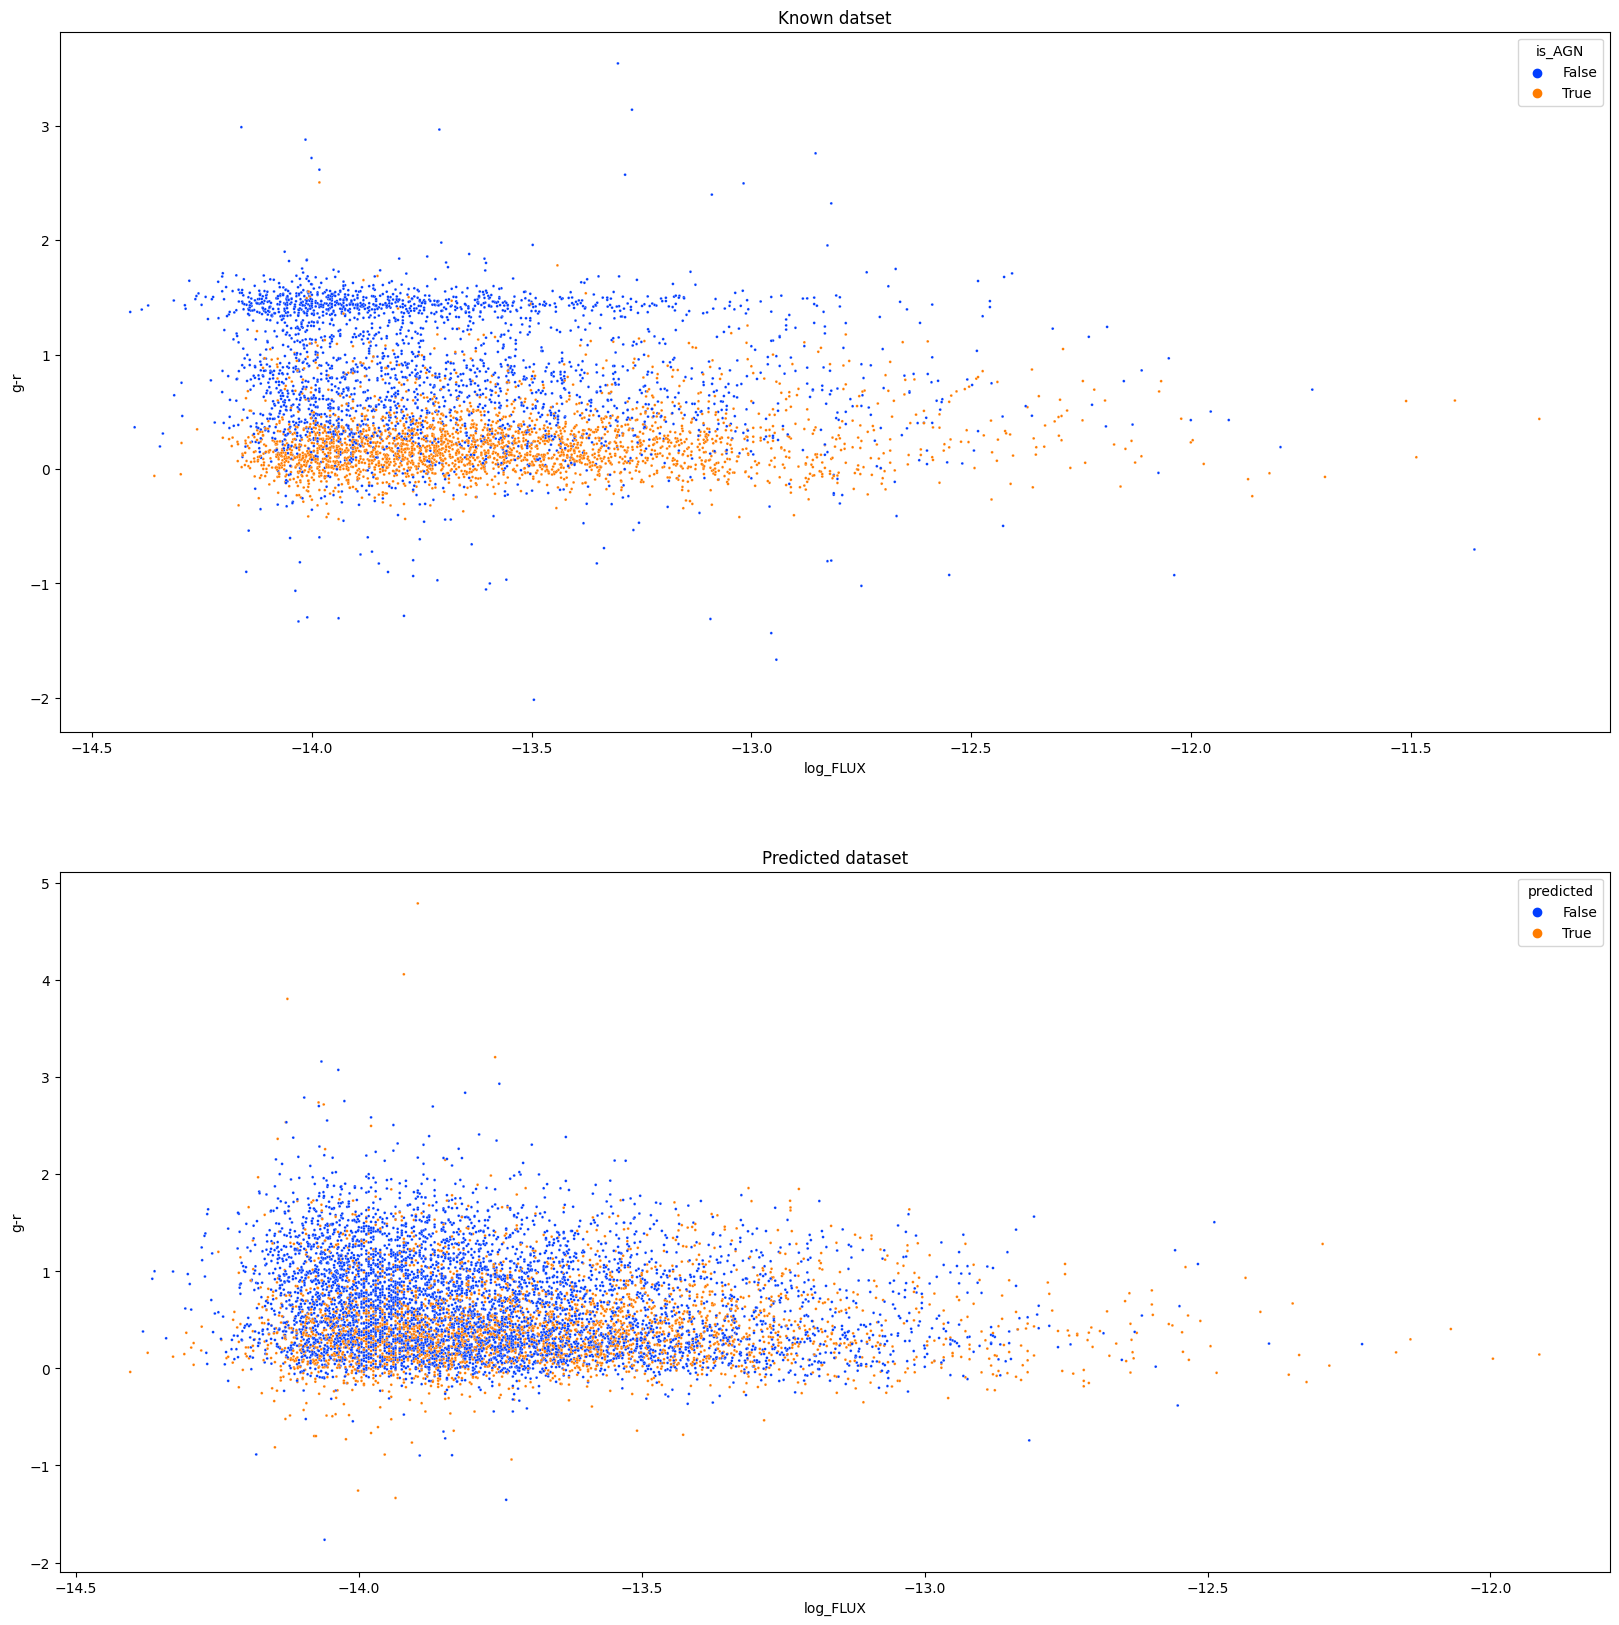

In [ ]:
fig, ax =plt.subplots(2,1, figsize = (20,20))
plot1 = sns.scatterplot(x=known_df["log_FLUX"], y = (known_df["LS8_g"]-known_df["LS8_r"]), hue=known_df["is_AGN"], palette="bright", ax=ax[0], s=4)
plot1.set(ylabel= "g-r", title = "Known datset")
plot2 = sns.scatterplot(x=unknown_df["log_FLUX"], y = (unknown_df["LS8_g"]-unknown_df["LS8_r"]), hue=unknown_df["predicted"].astype(bool), palette="bright", ax=ax[1], s=4)
plot2.set(ylabel= "g-r", title = "Predicted dataset")

In [ ]:
red_df = df[~df.SPECZ_REDSHIFT.isnull()]
red_df = red_df[red_df.is_AGN=="Unknown"]
red_df = red_df.drop("is_AGN", axis=1)
red_df["predicted"] = model.predict(red_df[['LS8_g', 'LS8_r', "LS8_z", "W1", "W2", "W3", "W4", "log_FLUX","classification"]]).astype(bool)
red_df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type,log_FLUX,classification,predicted
eFEDS J091420.0+013747,138.583713,1.629928,1.220000e-12,138.583582,1.629933,4,0.1906,0.0893,0.165,0.102,...,0.001574,0.165157,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,-11.913640,2,True
eFEDS J083356.3-010113,128.484874,-1.020296,1.010000e-12,128.485192,-1.020079,4,-0.0255,0.0361,0.035,0.042,...,0.000721,0.290748,SECURE EXTRAGALACTIC,2.986944,0.637654,1.0,Galaxy,-11.995679,2,True
eFEDS J085624.3-003644,134.101294,-0.612294,6.810000e-13,134.101082,-0.612069,4,-0.0098,0.1184,0.031,0.129,...,0.002088,0.235988,SECURE EXTRAGALACTIC,NaN,NaN,1.0,Star,-12.166853,2,True
eFEDS J084343.1+040335,130.929602,4.059758,5.050000e-13,130.929445,4.059645,4,NaN,NaN,NaN,NaN,...,0.001578,0.202165,SECURE EXTRAGALACTIC,NaN,NaN,1.0,GinCl,-12.296709,2,True
eFEDS J092851.8+041629,142.215978,4.274862,4.730000e-13,142.215986,4.275031,4,0.0791,0.1768,0.002,0.169,...,0.002043,0.500830,SECURE EXTRAGALACTIC,NaN,NaN,2.0,Galaxy,-12.325139,2,True


<Axes: xlabel='SPECZ_REDSHIFT', ylabel='Count'>

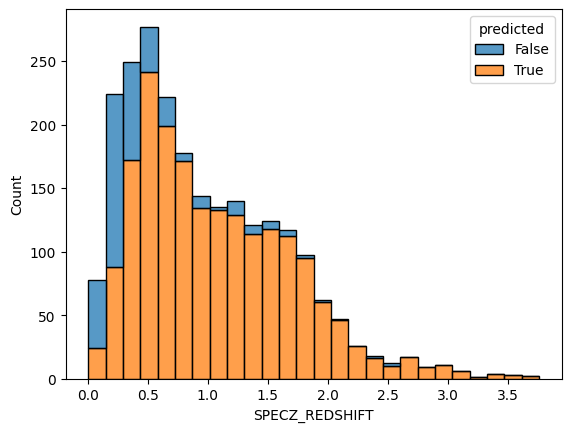

In [ ]:
sns.histplot(data = red_df, x="SPECZ_REDSHIFT", hue = "predicted", multiple="stack")

In [ ]:
from astropy.convolution import Box1DKernel
box1d = Box1DKernel(100)
sns.lineplot(x=metrics_df["rate"], y=box1d(metrics_df["accuracy"]), hue = metrics_df["iter"])

TypeError: ignored

In [ ]:
metrics_df["smooth_accuracy"] = 0

In [ ]:
metrics_df.head()

,rate,iter,accuracy,smooth_accuracy
0,0.001,100,0.939535,0
1,0.001,200,0.940465,0
2,0.001,300,0.948837,0
3,0.001,400,0.954419,0
4,0.001,500,0.958140,0


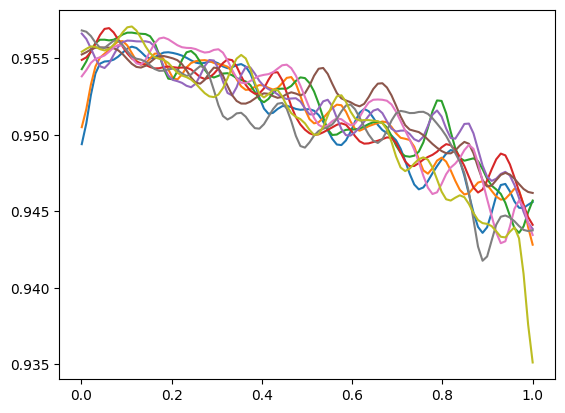

In [ ]:
from scipy.ndimage import gaussian_filter1d
for i in metrics_df.iter.unique():
  smoothed = (gaussian_filter1d(metrics_df[metrics_df.iter == i].accuracy, sigma = 2))
  plt.plot(metrics_df[metrics_df.iter == i]["rate"], smoothed)

plt.show()


<Axes: xlabel='rate', ylabel='smooth_accuracy'>

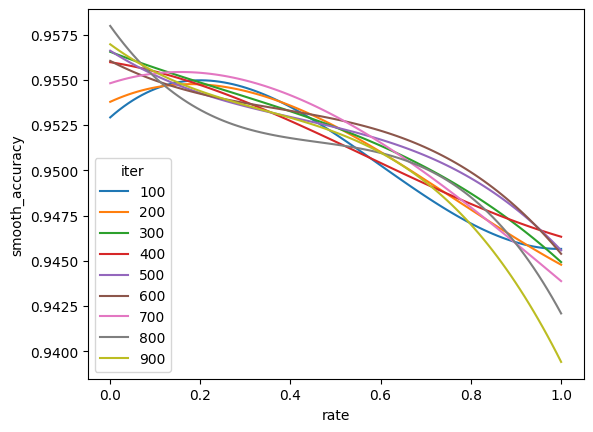

In [ ]:
from scipy import interpolate
for i in metrics_df.iter.unique():
  spline = interpolate.UnivariateSpline(metrics_df[metrics_df.iter == i]["rate"],metrics_df[metrics_df.iter == i]["accuracy"])
  metrics_df.loc[metrics_df.iter == i, "smooth_accuracy"] = spline(metrics_df.loc[metrics_df.iter == i, "rate"])

sns.lineplot(data = metrics_df, x="rate", y= "smooth_accuracy", hue = metrics_df["iter"].astype(str))

In [ ]:
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

metrics_dic = {"samples":[],"estimators":[],"accuracy":[]}
for estimators in range(100,1000, 100):
  for samples in range(2,10):
    forest = RandomForestClassifier(n_estimators = estimators, min_samples_split = samples).fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    metrics_dic["samples"].append(samples)
    metrics_dic["estimators"].append(estimators)
    metrics_dic["accuracy"].append(metrics.accuracy_score(y_test, y_pred))

metrics_df=pd.DataFrame(metrics_dic)

<Axes: xlabel='estimators', ylabel='smooth_accuracy'>

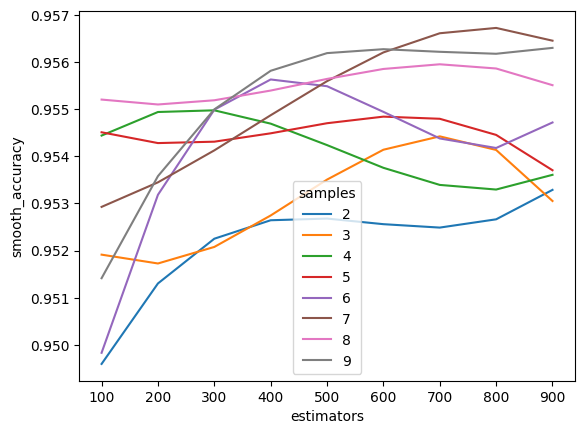

In [ ]:
from scipy import interpolate
metrics_df["smooth_accuracy"] = 0
for i in metrics_df.samples.unique():
  spline = interpolate.UnivariateSpline(metrics_df[metrics_df.samples == i]["estimators"],metrics_df[metrics_df.samples == i]["accuracy"])
  metrics_df.loc[metrics_df.samples == i, "smooth_accuracy"] = spline(metrics_df.loc[metrics_df.samples == i, "estimators"])

sns.lineplot(data = metrics_df, x="estimators", y= "smooth_accuracy", hue = metrics_df["samples"].astype(str))